<a href="https://colab.research.google.com/github/farshahid04/AHI-Diabetes-Data/blob/main/AHI-Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


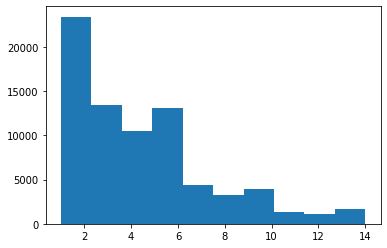

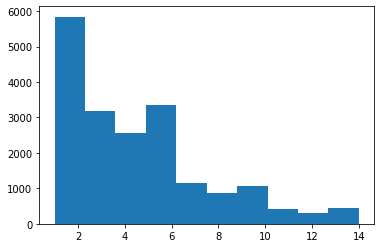

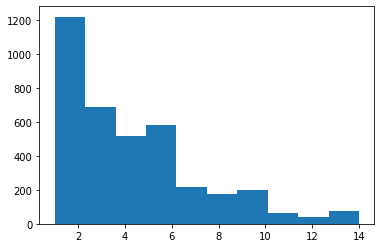

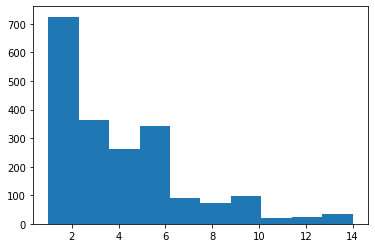

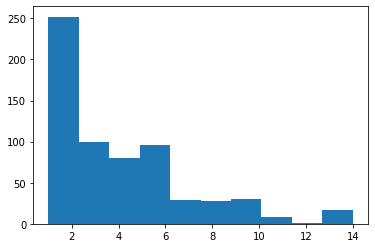

0.8834122077940734
0.6547313580465812
0.8815173137212615
1.452966930425375
1.3433672142980733
skew white:  1.1408338820115953
skew black:  1.0842526277672324
1.1457212691157455
1.2932546139163583
1.2876932024458374


count    641.000000
mean       3.995320
std        2.937097
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       14.000000
Name: time_in_hospital, dtype: float64

In [4]:
import pandas as pd
import numpy as np 

diabetes = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/AHI_DataSci_507/main/Datasets/Diabetes/DB1_Diabetes/diabetic_data.csv')

diabetes_small = diabetes.sample(100)


## Data transformation step 

diabetes = diabetes.replace('?', np.NaN)



### generate list of var names 
list(diabetes_small)


# 1 factor of RACE has 5 levels: 
    
# Lets replace nan for diabetes.race with 'Other'

diabetes['race'] = diabetes['race'].replace(np.NaN, 'Other')    
diabetes.race.value_counts()
diabetes['race'].value_counts() 
len(diabetes['race'].value_counts() )

# 1 factor of AGE we have 10 levels 
diabetes.age.value_counts() 
diabetes['age'].value_counts() 

# 1 factor of PAYER_CODE we have 17 levels 
diabetes.payer_code.value_counts()
len(diabetes.payer_code.value_counts())

# 1 factor of medical_specialty we have 72 levels 
diabetes.medical_specialty.value_counts()
len(diabetes.medical_specialty.value_counts())

specialtycounts = pd.DataFrame(diabetes.medical_specialty.value_counts())      
specialtycounts = specialtycounts.reset_index()


#### Continuous values: 
    
timeinhospital = diabetes['time_in_hospital']
labprocedures = diabetes['num_lab_procedures'] 




# 1 way anova 
# 1 DV - time_in_hospital
# 1 IV - Race 

# is there a difference between the "levels" of race 
# and time in hospital? 


### Checking assumptions....

# From regression or ANOVA framework
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew, bartlett


# DV ~ C(IV) + C(IV)
model = smf.ols("time_in_hospital ~ C(race)", data = diabetes).fit()
stats.shapiro(model.resid)



# Lets create a chart 

race1 = diabetes[diabetes['race'] == 'Caucasian']
race2 = diabetes[diabetes['race'] == 'AfricanAmerican']
race3 = diabetes[diabetes['race'] == 'Other']
race4 = diabetes[diabetes['race'] == 'Hispanic']
race5 = diabetes[diabetes['race'] == 'Asian']

plt.hist(race1['time_in_hospital'])
plt.show()

plt.hist(race2['time_in_hospital'])
plt.show()

plt.hist(race3['time_in_hospital'])
plt.show()

plt.hist(race4['time_in_hospital'])
plt.show()

plt.hist(race5['time_in_hospital'])
plt.show()



# kertosis 
print(kurtosis(race1['time_in_hospital']))
print(kurtosis(race2['time_in_hospital']))
print(kurtosis(race3['time_in_hospital']))
print(kurtosis(race4['time_in_hospital']))
print(kurtosis(race5['time_in_hospital']))

# skewness 
print('skew white: ', skew(race1['time_in_hospital']))
print('skew black: ', skew(race2['time_in_hospital']))
print(skew(race3['time_in_hospital']))
print(skew(race4['time_in_hospital']))
print(skew(race5['time_in_hospital']))


#### Homogeneity of Variance 
## barlett test 


stats.bartlett(race1['time_in_hospital'],
               race2['time_in_hospital'],
               race3['time_in_hospital'],
               race4['time_in_hospital'],
               race5['time_in_hospital']
               )






## Template 
stats.f_oneway(race1['time_in_hospital'],
               race2['time_in_hospital'],
               race3['time_in_hospital'],
               race4['time_in_hospital'],
               race5['time_in_hospital'])

## Post-hoc analysis for significant differences between groups
# TUKEY HONESTLY SIGNIFICANT DIFFERENCE (HSD)
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(diabetes['time_in_hospital'], diabetes['race'])
post_hoc_res = comp.tukeyhsd()
tukey1way = pd.DataFrame(post_hoc_res.summary())



race1['time_in_hospital'].describe()
race2['time_in_hospital'].describe()
race5['time_in_hospital'].describe()
